128.97643600000001

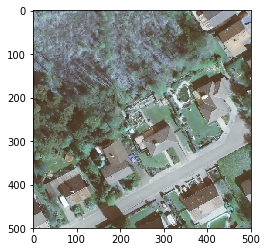

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

img = cv2.imread('test.png')
gs_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist_img = cv2.equalizeHist(gs_img)
hist_img  = cv2.medianBlur(hist_img,11)


plt.imshow(img)
cv2.imwrite('test_prep.png', hist_img)
hist_img.mean()

True

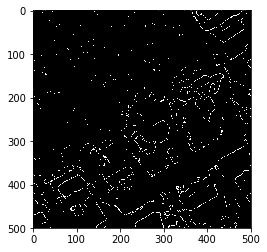

In [2]:
gss_img  = cv2.GaussianBlur(hist_img,(3,3),0.000001,0.000001)
lap_img = cv2.Laplacian(gss_img,cv2.CV_64F)
ret, lap_img = cv2.threshold(lap_img,20,255,cv2.THRESH_BINARY)
lap_img  = lap_img.astype(np.uint8)


plt.imshow(lap_img, cmap='gray')
cv2.imwrite('test_lap.png', lap_img)


In [3]:
corn = np.float32(lap_img)
dst = cv2.cornerHarris(corn,2,3,0.1)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.1*dst.max()]=[0,0,255]

plt.imshow(img)
cv2.imwrite('test_corners.png', img)

True

In [4]:
'''
img2 = cv2.imread('test.png')
gs_img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gs_img2 = cv2.equalizeHist(gs_img)
gs_img2  = cv2.GaussianBlur(gs_img2,(3,3),0,0)
im2, contours, hierarchy = cv2.findContours(gs_img2,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    roi=gs_img2[y:y+h,x:x+w]
    
    cv2.drawContours(img2, contours, -1, (0,255,0), 2)
plt.imshow(img2)
cv2.imwrite('test_boundbox.png', img2)
'''
'Not very helpful, same as edge detection'

'Not very helpful, same as edge detection'

In [5]:
corn_bin = np.where(dst>0.1*dst.max(), 1,0)
print (np.count_nonzero(corn_bin))

corn_list = []
far_thold = 100

            

3547


In [3]:
img2 = cv2.imread('test.png')
gs_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
gs_img2 = cv2.equalizeHist(gs_img)
gs_img2  = cv2.GaussianBlur(gs_img2,(3,3),0,0)
gs_img2 = cv2.medianBlur(gs_img2, 11)

edges = cv2.Canny(gs_img2,250,255)
lines = cv2.HoughLinesP(edges,1,np.pi/180,10,minLineLength=20,maxLineGap=3)

if lines.size != 0:
    for line in lines:
        x1,y1,x2,y2 = line[0]
        cv2.line(img2,(x1,y1),(x2,y2),(0,255,0),2)


plt.imshow(img2)
cv2.imwrite('test_canny.png', edges)
cv2.imwrite('test_lines.png', img2)



True

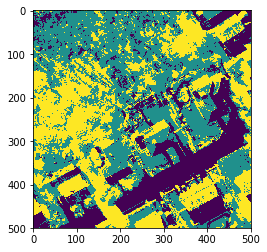

In [9]:
img = cv2.imread('test.png')

#img  = cv2.medianBlur(hist_img,11)
img = np.float32(img)
img = img.reshape((-1,3))

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 1000, 0.001)
ret,label,center=cv2.kmeans(img,3,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

label = label.reshape(500,500)
#label += edges
img = img.reshape(500,500,3)
plt.imshow(label)
plt.savefig ( 'test_kmeans.png', dpi=2000)
#cv2.imwrite('test_col_prep.png', img.reshape(500,500,3))

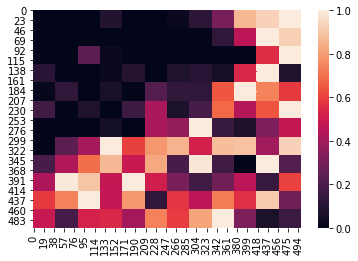

(1.0, 0.0, 0.36847736759152616)

In [12]:
import seaborn as sns
from sklearn.preprocessing import Normalizer
pic = edges
sq = 12
ind = len(pic)//sq
sub = []

for i in range(sq):
    for j in range(sq):
        sub.append(pic[i*ind:(i+1)*ind,j*ind:(j+1)*ind])
        
means = [(i.mean()) for i in sub]

means = np.array(means).reshape(-1,sq)
means = Normalizer(norm='max').fit_transform(means)
#sns.heatmap(means)

means = cv2.resize(means, (500,500), interpolation=0)
sns.heatmap(means)

plt.savefig('test_hmap.png', dpi=2000)
plt.show()
means.max(), means.min(), means.mean()

In [13]:
img = cv2.imread('test.png')

thold = 0.12

for i in range(means.shape[0]):
    for j in range(means.shape[1]):
        if means[i,j] < thold:
            img[i,j] = np.array([0,0,0])

plt.imshow(img)
cv2.imwrite('test_cut.png', img)
plt.show()


In [28]:
img = cv2.imread('test.png')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (10,0,0), (100,255,255))
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, cv2.getStructuringElement(cv2.MORPH_RECT,(7,7)))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_RECT,(5,5)))
mask = cv2.bitwise_not(mask)
img = cv2.bitwise_and(img,img, mask= mask)
plt.imshow(img)
cv2.imwrite('test_hsvcut.png', img)


True